In [1]:
import os
from scipy.misc import imread, imresize
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
cwd = os.getcwd()
print("Current folder is %s" % (cwd))

Current folder is C:\dss\DeepLearning_beginning


In [3]:
def print_typeshape(img):
    print("Type is %s" % (type(img)))
    print("Shape is %s" % (img.shape,))

##### Load an image

In [4]:
cat = imread("img/cat.jpg")
print_typeshape(cat)

Type is <class 'numpy.ndarray'>
Shape is (1600, 2400, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  """Entry point for launching an IPython kernel.


##### Plot Loaded image

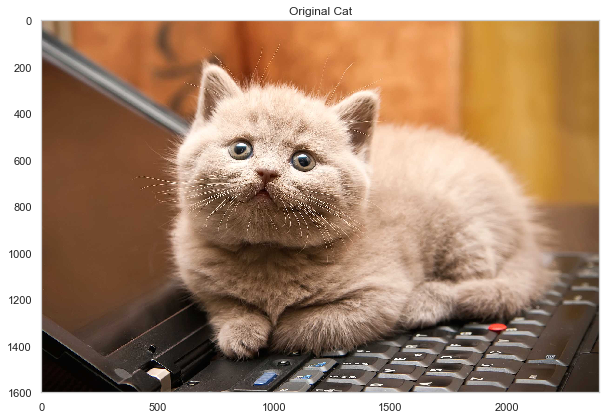

In [7]:
plt.figure(figsize=(10,8))
plt.imshow(cat)
plt.grid(False)
plt.title("Original Cat")
plt.show()

##### Load + Cast to float

In [9]:
# Load
cat2 = imread("img/cat.jpg").astype(np.float)
print_typeshape(cat2)

Type is <class 'numpy.ndarray'>
Shape is (1600, 2400, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


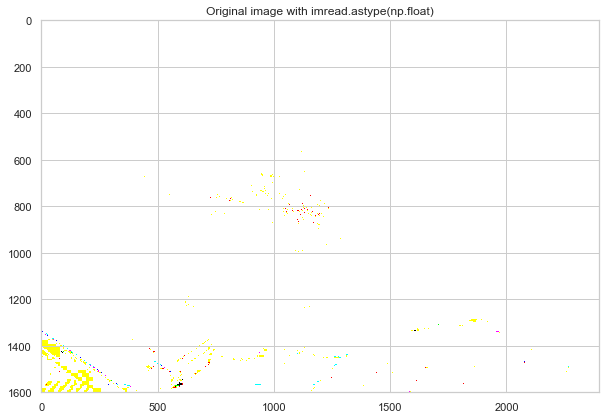

In [13]:
# Plot
plt.figure(figsize=(10,8))
plt.imshow(cat2)
plt.grid(False)
plt.title("Original image with imread.astype(np.float)")
plt.draw()

```
integer 타입이면 0~255사이의 값을 가질 것으로 가정하고
float 타입이면 0~1 사이의 값을 가질 것으로 가정한다.
따라서 float 타입의 경우 255로 나눠줘야 한다.
```

In [14]:
# 다시 Load
cat2 = imread("img/cat.jpg").astype(np.float) / 255.
print_typeshape(cat2)

Type is <class 'numpy.ndarray'>
Shape is (1600, 2400, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  


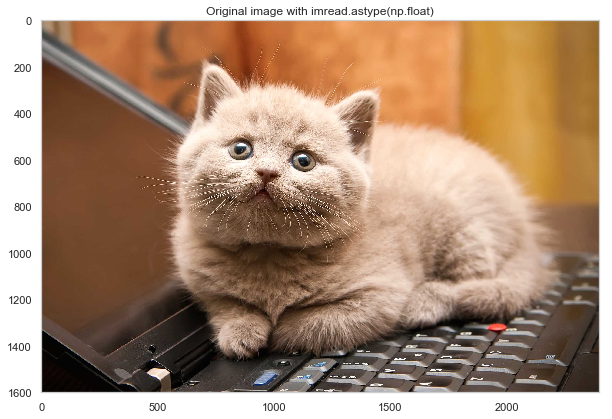

In [15]:
# 다시 Plot
plt.figure(figsize=(10,8))
plt.imshow(cat2)
plt.grid(False)
plt.title("Original image with imread.astype(np.float)")
plt.draw()

##### Resize

Type is <class 'numpy.ndarray'>
Shape is (100, 100, 3)


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  


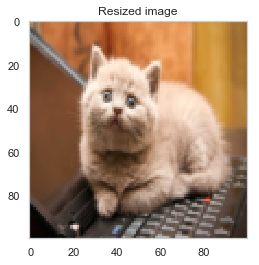

In [17]:
# resize
catsmall = imresize(cat, [100,100])
print_typeshape(catsmall)

# plot
plt.figure(1)
plt.imshow(catsmall)
plt.grid(False)
plt.title("Resized image")
plt.show()

##### GrayScale - 흑백사진으로 바꾸기
- 따로 패키지가 없어 직접 함수를 만들어준다.

In [18]:
def rgb2gray(rgb):
    if len(rgb.shape) is 3:
        return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])
    else:
        print("Current image is Gray!")
        return rgb

In [19]:
catsmall_gray = rgb2gray(catsmall)
print("Size of catsmallgray is %s" % (catsmall_gray.shape,))
print("Type of catsmallgray is ", type(catsmall_gray))

Size of catsmallgray is (100, 100)
Type of catsmallgray is  <class 'numpy.ndarray'>


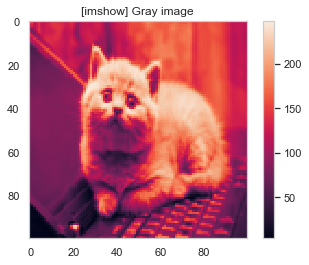

In [26]:
plt.imshow(catsmall_gray) # cmap없으면 이상한 그림이 됨
plt.title("[imshow] Gray image")
plt.grid(False)
plt.colorbar()
plt.show()

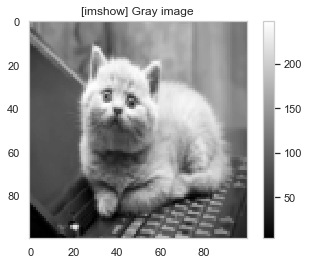

In [25]:
plt.imshow(catsmall_gray, cmap=plt.get_cmap("gray")) # cmap없으면 이상한 그림이 됨
plt.title("[imshow] Gray image")
plt.grid(False)
plt.colorbar()
plt.show()

##### Reshape

In [28]:
# Matrix to Vector
catrowvec = np.reshape(catsmall_gray, (1, -1)) # 1 x 10,000 (row:1, column : -1 mean 나머지 알아서넣어줘)
print("Size of catsmallgray is %s" % (catrowvec.shape,))
print("Type of catsmallgray is ", type(catrowvec))

# Vector to Matrix
catmatrix = np.reshape(catrowvec, (100,-1)) # 100 x 100 (row:100, column : -1 mean 나머지 알아서넣어줘)
print("Size of catsmallgray is %s" % (catmatrix.shape,))
print("Type of catsmallgray is ", type(catmatrix))

Size of catsmallgray is (1, 10000)
Type of catsmallgray is  <class 'numpy.ndarray'>
Size of catsmallgray is (100, 100)
Type of catsmallgray is  <class 'numpy.ndarray'>


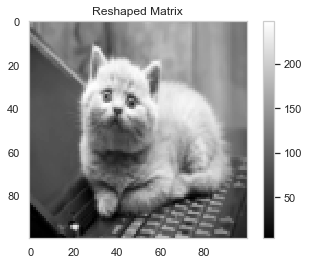

In [29]:
plt.imshow(catmatrix, cmap=plt.get_cmap("gray")) # cmap없으면 이상한 그림이 됨
plt.title("Reshaped Matrix")
plt.grid(False)
plt.colorbar()
plt.show()

### Load from folder

1. 폴더 안에 사진들 확인

In [33]:
cwd = os.getcwd()
path = cwd + "/img/"
file_list = os.listdir(path)
print("[{}] file are in [{}]".format(len(file_list), path))

[4] file are in [C:\dss\DeepLearning_beginning/img/]


2. 사진 리스트

In [35]:
for i, f in enumerate(file_list):
    print("{}. file is [{}]".format(i,f))

0. file is [cat.jpg]
1. file is [cow.jpg]
2. file is [dog.jpg]
3. file is [horse.jpeg]


In [36]:
# 사진 파일이 아닌 데이터 자르기
valid_exts = [".jpg",".gif",".png",".tga",".jpeg"]
images = []
names = []
for f in file_list:
    ext = os.path.splitext(f)[1]
    print(ext)
    if ext.lower() not in valid_exts:
        continue
    fullpath = os.path.join(path,f)
    images.append(imread(fullpath))
    names.append(os.path.splitext(f)[0])

.jpg
.jpg
.jpg
.jpeg


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  # This is added back by InteractiveShellApp.init_path()


In [37]:
names

['cat', 'cow', 'dog', 'horse']